In [3]:
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [4]:
# Step 1. Load data, show info and sample
# 1.1 Read data
df_raw = pd.read_excel(
   'https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx', 
   parse_dates=['Date']
)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [5]:
# 1.1 Show sample
df_raw.sample(5, random_state=1234)

,Date,Region,Type,Units,Sales
681,2020-11-27,East,Children's Clothing,32.0,342
990,2020-12-17,North,Children's Clothing,7.0,217
155,2020-06-13,East,Children's Clothing,30.0,336
768,2020-06-25,North,Women's Clothing,5.0,644
438,2020-10-07,North,Women's Clothing,30.0,462


In [6]:
# Step 2. Transform to standard format
import pandas as pd
import pandas as pd
import pandas as pd
df = (
    df_raw
    .copy()
    .set_axis(
        df_raw
        .columns.str.lower()
        .str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.slice(0,40), axis=1
    )
    .astype({'region':'category', 
             'type':'category'})
    .assign(
        date = lambda x: pd.to_datetime(x['date'], format='%d/%m/%Y')
    )
    #.iloc[:, [-1] + [x for x in range(df_raw.shape[1]) if x!=4]]
    .set_index('date')
)

In [10]:
df['sales'].resample('ME').sum()

date
2020-01-31    36733
2020-02-29    42348
2020-03-31    32245
2020-04-30    36246
2020-05-31    34790
2020-06-30    38960
2020-07-31    33017
2020-08-31    32763
2020-09-30    39547
2020-10-31    31715
2020-11-30    30740
2020-12-31    38150
Freq: ME, Name: sales, dtype: int64

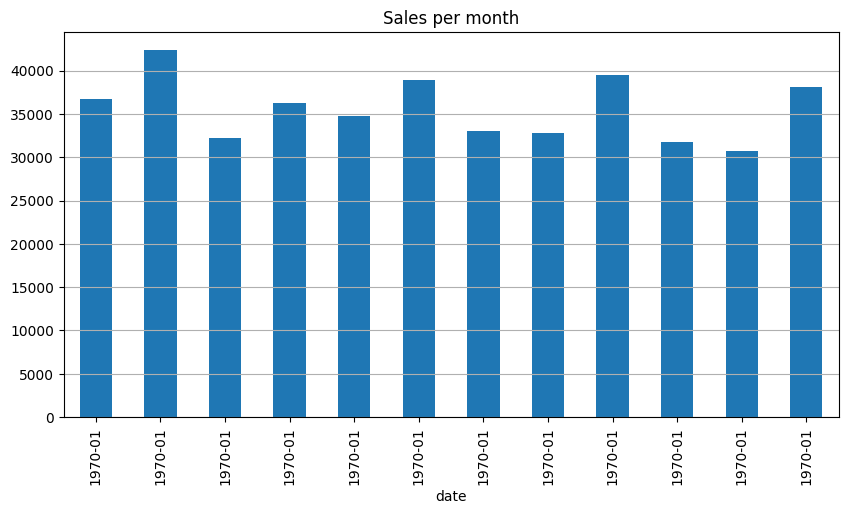

In [ ]:
# Step 3. Perform busines analysis
# 3.1 Plot sales per month
fig, ax = plt.subplots(figsize=(10, 5))
df['sales'].resample('ME').sum().plot(kind='bar', title='Sales per month', ax=ax)
#ax.set_xticks()
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax.grid(axis='y')
plt.show()